# Sentimental Analysis of IMDb review.
### Analyzing the reviews and sentiments OF them 
![imdb](https://static.amazon.jobs/teams/53/images/IMDb_Header_Page.jpg?1501027252)

# Basic terminologies.
### What is IMDb?
IMDb is an online database of information related to films, television series, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews.

### What is sentimental analysis?
Sentiment analysis is analytical technique that uses statistics, natural language processing, and machine learning to determine the emotional meaning of communications.

# End Goal:
End goal of this project is to analyze the IMDb reviews and predit the sentiments regarding the reviews. As the data is in the text format and our main task is:
- Understanding the data 
- Analyzing and cleaning the data with the help of NLP text cleaning techniques.
- Build a AI/ML model that can predict the sentiments based on reviews on the IMDb


# Description of Dataset
MDB dataset having 50K movie reviews for natural language processing or Text analytics. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. It consists of a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So,we have to predict the number of positive and negative reviews using either classification or deep learning algorithms.

## Loading necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from xgboost import XGBClassifier

from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re, string, unicodedata
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense,Input,Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D,Bidirectional, Flatten, BatchNormalization, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import transformers

In [2]:
data=pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df = data.copy()
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Exploratory Data Analysis, text cleaning, and Visualization

In [3]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


<AxesSubplot:xlabel='sentiment', ylabel='count'>

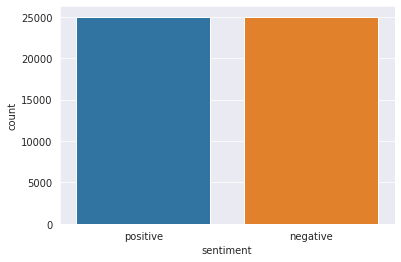

In [4]:
sns.set_style('darkgrid')
sns.countplot(df.sentiment)

- Dataset is balanced

In [5]:
df.isna().sum() # checking for any missing values

review       0
sentiment    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
# duplicates in the data
num_duplicates = df.duplicated().sum()
print("There are {} duplicate reviews present in the dataset".format(num_duplicates))

There are 418 duplicate reviews present in the dataset


In [8]:
review = df['review']
duplicated_review = df[review.isin(review[review.duplicated()])].sort_values("review")
duplicated_review.head()

,review,sentiment
34058,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
47467,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
29956,"""Three"" is a seriously dumb shipwreck movie. M...",negative
31488,"""Three"" is a seriously dumb shipwreck movie. M...",negative
47527,"""Witchery"" might just be the most incoherent a...",negative


## Text Cleaning

StopWords:

Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus. We first download it to our python environment.


In [9]:
stop = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stop.update(punctuations)

## Basic Text Cleaning

In [10]:
# picking random text form review column
sample_text = df.review[8]
sample_text

"Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. <br /><br />The only thing that prevents me giving this a 1-score is Harvey Keitel - while this is far from his best performance he at least seems to be making a bit of an effort. One for Keitel obsessives only."

In [11]:
# Removing HTML
soup = BeautifulSoup(sample_text, "html.parser")
sample_text = soup.get_text()
print(sample_text)

Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. The only thing that prevents me giving this a 1-score is Harvey Keitel - while this is far from his best performance he at least seems to be making a bit of an effort. One for Keitel obsessives only.


In [12]:
# Replacing sepcial characters and symbols, non-alphabets with sapces
sample_text = re.sub('\[[^]]*\]',' ',sample_text)
sample_text = sample_text.lower() # converting text into lowercase
print(sample_text)

encouraged by the positive comments about this film on here i was looking forward to watching this film. bad mistake. i've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). the film looks cheap and nasty and is boring in the extreme. rarely have i been so happy to see the end credits of a film. the only thing that prevents me giving this a 1-score is harvey keitel - while this is far from his best performance he at least seems to be making a bit of an effort. one for keitel obsessives only.


In [13]:
sample_text = re.sub('[^a-zA-Z]',' ',sample_text)
print(sample_text)

encouraged by the positive comments about this film on here i was looking forward to watching this film  bad mistake  i ve seen      films and this is truly one of the worst of them   it s awful in almost every way  editing  pacing  storyline   acting   soundtrack  the film s only song   a lame country tune   is played no less than four times   the film looks cheap and nasty and is boring in the extreme  rarely have i been so happy to see the end credits of a film  the only thing that prevents me giving this a   score is harvey keitel   while this is far from his best performance he at least seems to be making a bit of an effort  one for keitel obsessives only 


In [14]:
# Removing stop words
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

sample_text = nltk.word_tokenize(sample_text)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
sample_text = [word for word in sample_text if not word in set(stopwords.words("english"))]

In [16]:
sample_text

['encouraged',
 'positive',
 'comments',
 'film',
 'looking',
 'forward',
 'watching',
 'film',
 'bad',
 'mistake',
 'seen',
 'films',
 'truly',
 'one',
 'worst',
 'awful',
 'almost',
 'every',
 'way',
 'editing',
 'pacing',
 'storyline',
 'acting',
 'soundtrack',
 'film',
 'song',
 'lame',
 'country',
 'tune',
 'played',
 'less',
 'four',
 'times',
 'film',
 'looks',
 'cheap',
 'nasty',
 'boring',
 'extreme',
 'rarely',
 'happy',
 'see',
 'end',
 'credits',
 'film',
 'thing',
 'prevents',
 'giving',
 'score',
 'harvey',
 'keitel',
 'far',
 'best',
 'performance',
 'least',
 'seems',
 'making',
 'bit',
 'effort',
 'one',
 'keitel',
 'obsessives']

- Like that we will apply this techniques to text data but we will not use tokenizer because the text analysis task is remaining.

## Cleaning the data 

In [17]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

# Applying function on review column
df['review'] = df['review'].apply(denoise_text)

In [18]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ex...,positive
1,wonderful little filming technique fashion giv...,positive
2,thought wonderful way spend time hot summer si...,positive
3,basically family little boy thinks zombie clos...,negative
4,petter time visually stunning film mattei offe...,positive


In [19]:
# Converting sentiment column in numbers(i.e, 0s or 1s)

df.sentiment.replace("positive",1,inplace=True)
df.sentiment.replace("negative",0,inplace=True)

df.head(10)

,review,sentiment
0,one reviewers mentioned watching oz episode ex...,1
1,wonderful little filming technique fashion giv...,1
2,thought wonderful way spend time hot summer si...,1
3,basically family little boy thinks zombie clos...,0
4,petter time visually stunning film mattei offe...,1
5,probably favorite story sacrifice dedication n...,1
6,sure would like see resurrection dated seahunt...,1
7,show fresh innovative idea first first years t...,0
8,encouraged positive comments film looking forw...,0
9,like original gut wrenching laughter like youn...,1


## Visulization

- WordCloud for postive and negatice texts

In [20]:
sns.set_style("whitegrid")

### WordCloud for Positive text

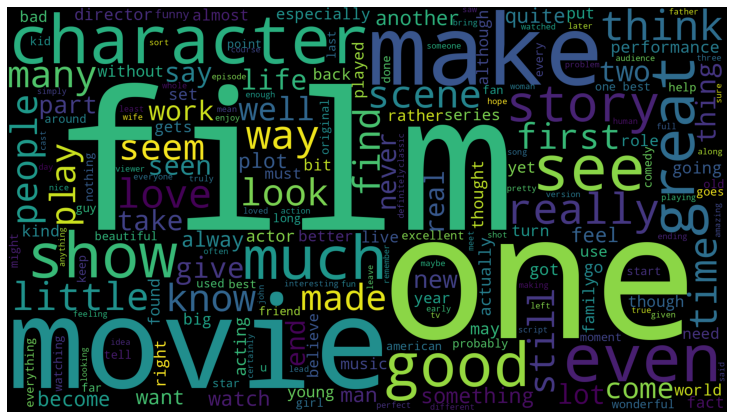

In [21]:
wordcloud = WordCloud(width=1920,height=1080).generate(" ".join(df[df.sentiment==1].review))
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### WordCloud for negative text

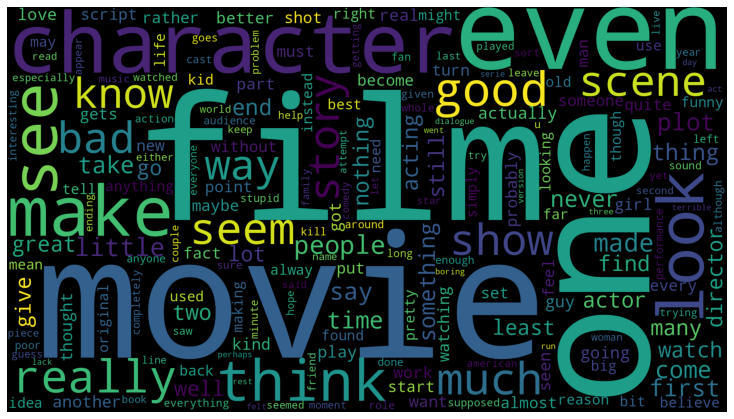

In [22]:
wordcloud = WordCloud(width=1920,height=1080).generate(" ".join(df[df.sentiment==0].review))
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Number of characters in texts

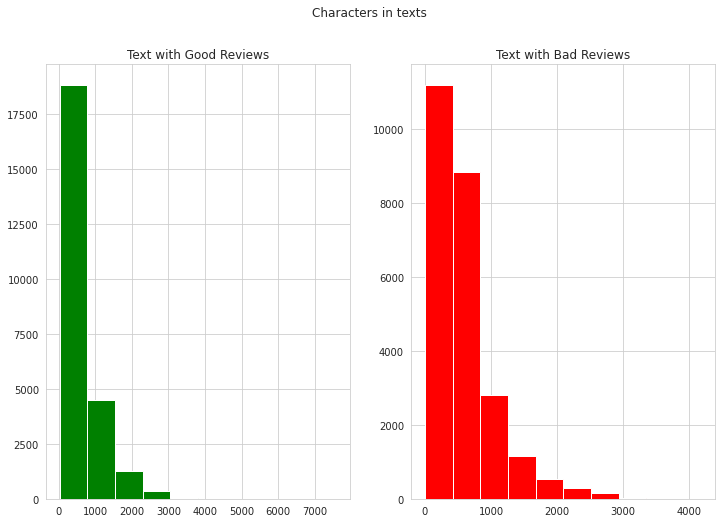

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']==1]['review'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Text with Good Reviews')
text_len=df[df['sentiment']==0]['review'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Characters in texts')
plt.show()

## Number of words in each text

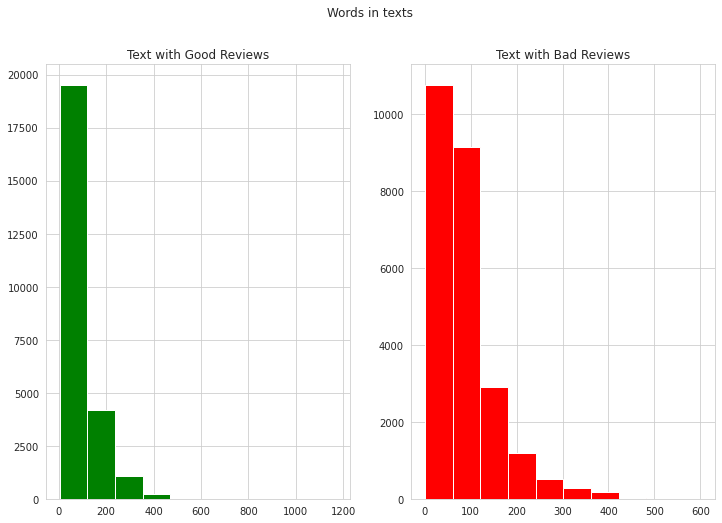

In [24]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']==1]['review'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Text with Good Reviews')
text_len=df[df['sentiment']==0]['review'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Words in texts')
plt.show()

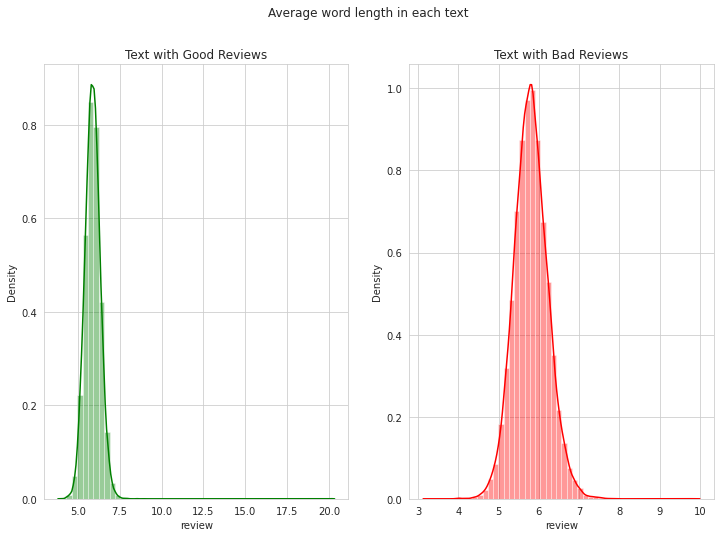

In [25]:
## Average word lenght in a text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
word=df[df['sentiment']==1]['review'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Text with Good Reviews')
word=df[df['sentiment']==0]['review'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Average word length in each text')
plt.show()

## Analyzing words 

In [26]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.review)
corpus[:5]

['one', 'reviewers', 'mentioned', 'watching', 'oz']

##### Most common words

In [27]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'movie': 61496,
 'film': 55088,
 'one': 45067,
 'like': 37303,
 'would': 23815,
 'even': 23720,
 'good': 23475,
 'really': 21806,
 'see': 20906,
 'get': 17692}

In [28]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#### Unigram(single word)

In [29]:
most_common_uni = get_top_text_ngrams(df.review,20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words",title="Common Word in Text",orientation='h',width=700,height=700,color='Common_words')
fig.show()

#### Bigram(two words)

In [30]:
most_common_bi = get_top_text_ngrams(df.review,20,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words", "Count"])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words",title="Common Bigrams in Text",orientation='h',width=700,height=700,color='Common_words')
fig.show()

#### Trigram(Three Words)

In [31]:
most_common_tri = get_top_text_ngrams(df.review,20,3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words", "Count"])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words",title="Common Trigrams in Text",orientation='h',width=700,height=700,color='Common_words')
fig.show()

# Data preprocecssing 

In [32]:
#splitting into train and test
train, test= train_test_split(df, test_size=0.2, random_state=42)
X_train, y_train = train['review'], train['sentiment']
X_test, y_test = test['review'], test['sentiment']

In [33]:
#Vectorizing data

tfidf = TfidfVectorizer() #tfidfVectorizer
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


count_vect = CountVectorizer() # CountVectorizer
X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

# Training Machine Learning models

---
## Cross Validation score vs Test accuracies:

The test result is more representative of the generalization ability of the model because it has never been used during the training process. However the cross-validation result is more representative because it represents the performance of the system on the 80% of the data instead of just the 20% of the training set. Moreover, if I change the split of my sets, the different test accuracies I get have a high variance but the average cross validation accuracy is more stable.


-----------

## Logistic Regression

Logistic Regression Accuracy:  87.72%

Logistic Regresion cross validation score:  87.00%


Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      4851
           1       0.89      0.87      0.88      5149

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



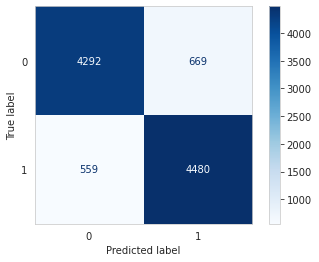

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
pred_lr = lr.predict(X_test_tfidf)
score_lr = accuracy_score(y_test, pred_lr)
lr_cvScore = cross_val_score(lr, X_train_tfidf, y_train, cv=5)
print("Logistic Regression Accuracy: ", "{:.2f}%".format(100*score_lr))
print("\nLogistic Regresion cross validation score: ","{:.2f}%".format(round(lr_cvScore.mean(),2)*100))
print("\n")
plot_confusion_matrix(lr, X_test_tfidf, y_test, cmap='Blues')
plt.grid(False)
print("Classification Report:\n")
print(classification_report(pred_lr,y_test))

## Multinomial Naive Bayes

Multinomial Naive Bayes Accuracy:  85.05%

Multinomial Naive Bayes cross validation score:  85.00%


Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5070
           1       0.84      0.86      0.85      4930

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



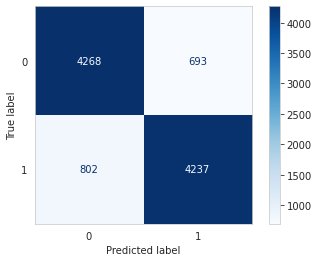

In [35]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)
pred_mnb = mnb.predict(X_test_tfidf)
score_mnb = accuracy_score(y_test, pred_mnb)
mnb_cvScore = cross_val_score(mnb, X_train_tfidf, y_train, cv=5)
print("Multinomial Naive Bayes Accuracy: ", "{:.2f}%".format(100*score_mnb))
print("\nMultinomial Naive Bayes cross validation score: ","{:.2f}%".format(round(mnb_cvScore.mean(),2)*100))
print("\n")
plot_confusion_matrix(mnb, X_test_tfidf, y_test, cmap='Blues')
plt.grid(False)
print("Classification Report:\n")
print(classification_report(pred_mnb,y_test))

## Liner SVM

Linear Support Vectpr Classifier Accuracy:  87.73%

Linear Support Vector Classifier cross validation score:  88.00%


Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4866
           1       0.89      0.87      0.88      5134

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



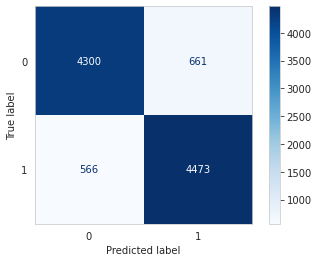

In [36]:
svc = LinearSVC(penalty='l2',loss='hinge')
svc.fit(X_train_tfidf, y_train)
pred_svc = svc.predict(X_test_tfidf)
score_svc = accuracy_score(y_test, pred_svc)
svc_cvScore = cross_val_score(svc, X_train_tfidf, y_train, cv=5)
print("Linear Support Vectpr Classifier Accuracy: ", "{:.2f}%".format(100*score_svc))
print("\nLinear Support Vector Classifier cross validation score: ","{:.2f}%".format(round(svc_cvScore.mean(),2)*100))
print("\n")
plot_confusion_matrix(svc, X_test_tfidf, y_test, cmap='Blues')
plt.grid(False)
print("Classification Report:\n")
print(classification_report(pred_svc,y_test))

[17:02:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:04:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:05:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:07:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

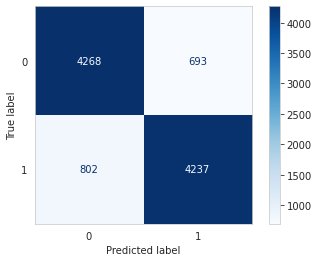

In [37]:
xgb = XGBClassifier()
xgb.fit(X_train_tfidf, y_train)
pred_xgb = xgb.predict(X_test_tfidf)
score_xgb = accuracy_score(y_test, pred_xgb)
xgb_cvScore = cross_val_score(xgb, X_train_tfidf, y_train, cv=5)
print("XGBoost Classifier Accuracy: ", "{:.2f}%".format(100*score_xgb))
print("\nXGBoost Classifier cross validation score: ","{:.2f}%".format(round(xgb_cvScore.mean(),2)*100))
print("\n")
plot_confusion_matrix(mnb, X_test_tfidf, y_test, cmap='Blues')
plt.grid(False)
print("Classification Report:\n")
print(classification_report(pred_xgb,y_test))

## Training the data with Neural Networks

In [38]:
# Function for plotting learning curve
def plotLearningCurve(history,epochs):
    epochRange = range(1,epochs+1)
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    
    ax[0].plot(epochRange,history.history['accuracy'],label='Training Accuracy')
    ax[0].plot(epochRange,history.history['val_accuracy'],label='Validation Accuracy')
    ax[0].set_title('Training and Validation Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()
    ax[1].plot(epochRange,history.history['loss'],label='Training Loss')
    ax[1].plot(epochRange, history.history['val_loss'],label='Validation Loss')
    ax[1].set_title('Training and Validation loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    fig.tight_layout()
    plt.show()

In [39]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
X_train, y_train = train['review'], train['sentiment']
X_test, y_test = test['review'], test['sentiment']
#splitting the train set into train and validation
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,
                                             test_size=0.2,random_state=10)

In [40]:
X_train.shape, y_train.shape

((32000,), (32000,))

In [41]:
#set up the tokenizer
MAX_VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE,oov_token="<oov>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
#print(word_index)
V = len(word_index)
print("Vocabulary of the dataset is : ",V)

Vocabulary of the dataset is :  69948


In [42]:
##create sequences of reviews
seq_train = tokenizer.texts_to_sequences(X_train)
seq_test =  tokenizer.texts_to_sequences(X_test)

In [43]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in seq_train + seq_test]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))

Maximum length of sequence in the list: 1171


In [44]:
# when setting the maximum length of sequence, variability around the average is used.
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))

Maximum length of the sequence when considering data only two standard deviations from average: 225


In [45]:
perc_covered = np.sum(np.array(seq_len_list) < max_seq_len) / len(seq_len_list)*100
print('The above calculated number coveres approximately {} % of data'.format(np.round(perc_covered,2)))

The above calculated number coveres approximately 94.52 % of data


In [46]:
#create padded sequences
pad_train=pad_sequences(seq_train,truncating = 'post', padding = 'pre',maxlen=max_seq_len)
pad_test=pad_sequences(seq_test,truncating = 'post', padding = 'pre',maxlen=max_seq_len)

In [47]:
X_train,X_val,y_train,y_val=train_test_split(pad_train,y_train,
                                             test_size=0.2,random_state=10)

In [48]:
def lstm_model(Xtrain,Xval,ytrain,yval,V,D,maxlen,epochs):

    print("----Building the model----")
    i = Input(shape=(maxlen,))
    x = Embedding(V + 1, D,input_length = maxlen)(i)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Conv1D(32,5,activation = 'relu')(x)
    x = Dropout(0.3)(x)
    x = MaxPooling1D(2)(x)
    x = Bidirectional(LSTM(128,return_sequences=True))(x)
    x = LSTM(64)(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(i, x)
    model.summary()
    
    #Training the LSTM
    print("----Training the network----")
    model.compile(optimizer= Adam(0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    early_stop = EarlyStopping(monitor='val_accuracy', 
                                mode='min', 
                               patience = 2 )
    
    checkpoints= tf.keras.callbacks.ModelCheckpoint(filepath='./',
                            monitor="val_accuracy",
                             save_best_only=True
                            )
    callbacks = [checkpoints,early_stop]
    r = model.fit(Xtrain,ytrain, 
                  validation_data = (Xval,yval), 
                  epochs = epochs, 
                  verbose = 2,
                  batch_size = 32)
#                   callbacks = callbacks)
    print("Train score:", model.evaluate(Xtrain,ytrain))
    print("Validation score:", model.evaluate(Xval,yval))
    n_epochs = len(r.history['loss'])
    
    return r,model,n_epochs


In [49]:
D = 64 #embedding dims
epochs = 5
r,model,n_epochs = lstm_model(X_train,X_val,y_train,y_val,V,D,max_seq_len,epochs)

----Building the model----


2022-05-07 17:11:28.022398: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-07 17:11:28.023661: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-07 17:11:28.024318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-07 17:11:28.025127: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 225)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 225, 64)           4476736   
_________________________________________________________________
batch_normalization (BatchNo (None, 225, 64)           256       
_________________________________________________________________
dropout (Dropout)            (None, 225, 64)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 221, 32)           10272     
_________________________________________________________________
dropout_1 (Dropout)          (None, 221, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 110, 32)           0     

2022-05-07 17:11:35.256852: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-07 17:11:39.504593: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


800/800 - 26s - loss: 0.4655 - accuracy: 0.7641 - val_loss: 0.3471 - val_accuracy: 0.8559
Epoch 2/5
800/800 - 15s - loss: 0.2852 - accuracy: 0.8853 - val_loss: 0.3349 - val_accuracy: 0.8647
Epoch 3/5
800/800 - 15s - loss: 0.2227 - accuracy: 0.9139 - val_loss: 0.3594 - val_accuracy: 0.8595
Epoch 4/5
800/800 - 15s - loss: 0.1657 - accuracy: 0.9385 - val_loss: 0.3950 - val_accuracy: 0.8548
Epoch 5/5
800/800 - 15s - loss: 0.1241 - accuracy: 0.9564 - val_loss: 0.4419 - val_accuracy: 0.8541
800/800 [==============================] - 6s 7ms/step - loss: 0.0465 - accuracy: 0.9882
Train score: [0.04652024433016777, 0.9882031083106995]
200/200 [==============================] - 2s 9ms/step - loss: 0.4419 - accuracy: 0.8541
Validation score: [0.441946417093277, 0.8540624976158142]


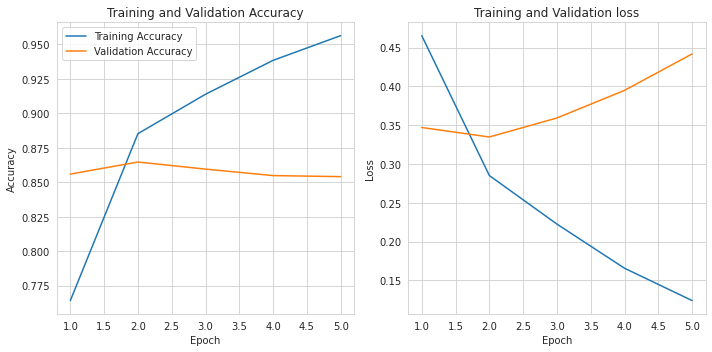

In [50]:
#Plot accuracy and loss
plotLearningCurve(r,n_epochs)

## Model Evaluation

In [51]:
print("Evaluate Model Performance on Test Set")
result = model.evaluate(pad_test, y_test)

Evaluate Model Performance on Test Set
313/313 [==============================] - 3s 8ms/step - loss: 0.4287 - accuracy: 0.8547


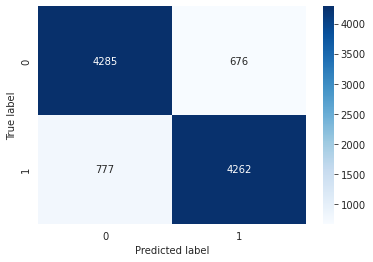

In [52]:
# Confusion MAtrix 
ypred = model.predict(pad_test)
ypred = ypred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [53]:
from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(y_test,ypred))

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4961
           1       0.86      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



---
#### Linear SVC peromed better than neural networks model. Now let's train with transformers.

# BERT

In [54]:
# Tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [55]:
train, test= train_test_split(df, test_size=0.2, random_state=42)
X_train, y_train = train['review'], train['sentiment']
X_test, y_test = test['review'], test['sentiment']
#splitting the train set into train and validation
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,
                                             test_size=0.2,random_state=10)

In [56]:
#pass our texts to the tokenizer. 
Xtrain_enc = tokenizer(X_train.tolist(), 
                       max_length=max_seq_len, 
                       truncation=True, 
                       padding='max_length', 
                       add_special_tokens=True, 
                       return_tensors='np') #return numpy object

Xval_enc = tokenizer(X_val.tolist(), 
                     max_length=max_seq_len, 
                     truncation=True, 
                     padding='max_length', 
                     add_special_tokens=True, 
                     return_tensors='np') #return numpy object

Xtest_enc = tokenizer(X_test.tolist(), 
                      max_length=max_seq_len, 
                      truncation=True,
                      padding='max_length', 
                      add_special_tokens=True, 
                      return_tensors='np') #return numpy object

In [57]:
# preparing our datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
            dict(Xtrain_enc),
            y_train
))
val_dataset = tf.data.Dataset.from_tensor_slices((
            dict(Xval_enc),
            y_val
))
test_dataset = tf.data.Dataset.from_tensor_slices((
            dict(Xtest_enc),
            y_test
))

## BERT Model

In [58]:
def bert_model(train_dataset,val_dataset,transformer,max_len,epochs):
    print("----Building the model----")
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_len,),dtype=tf.int32,name = 'attention_mask') #attention mask
    sequence_output = transformer(input_ids,attention_mask)[0]
    cls_token = sequence_output[:, 0, :]
    x = Dense(512, activation='relu')(cls_token)
    x = Dropout(0.1)(x)
    y = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[input_ids,attention_mask], outputs=y)
    model.summary()
    model.compile(Adam(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])
    r = model.fit(train_dataset.batch(32),batch_size = 32,
                  validation_data = val_dataset.batch(32),epochs = epochs)
                  #callbacks = callbacks
    print("Train score:", model.evaluate(train_dataset.batch(32)))
    print("Validation score:", model.evaluate(val_dataset.batch(32)))
    n_epochs = len(r.history['loss'])
    
    return r,model,n_epochs 

In [59]:
!pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [60]:
from transformers import TFDistilBertModel
transformer = TFDistilBertModel.from_pretrained("distilbert-base-uncased")

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

2022-05-07 17:15:02.579599: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the 

In [62]:
epochs=2
max_len = max_seq_len
r, model, n_epochs = bert_model(train_dataset, val_dataset, transformer,max_len,epochs)

----Building the model----
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 225)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 225)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model (TFDistilB TFBaseModelOutput(la 66362880    input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
tf.__operators__.getitem (Slici (None, 768)          0           

# BERT Model Evaluation

In [63]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(test_dataset.batch(32))
print(dict(zip(model.metrics_names, result)))

Evaluate Model Performance on Test set
313/313 [==============================] - 47s 148ms/step - loss: 0.3172 - accuracy: 0.8782
{'loss': 0.31717875599861145, 'accuracy': 0.8781999945640564}


## BERT model evaluation

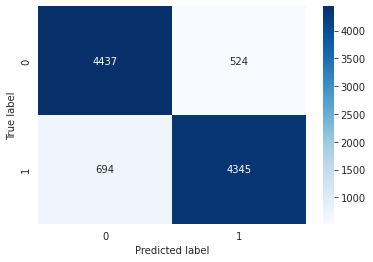

In [66]:
#Generate predictions for the test dataset
ypred = model.predict(test_dataset.batch(32))
ypred = ypred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

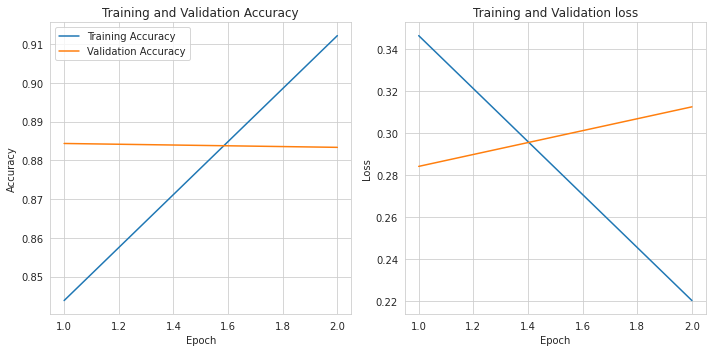

In [67]:
#Plot accuracy and loss
plotLearningCurve(r,n_epochs)

## GIVE AN UPVOTE💪